In [2]:
import pandas as pd
import numpy as np

In [3]:
patient = pd.read_csv('msk_chord_2024/data_clinical_patient.txt', sep='\t', comment='#')
patient.head(1)

,PATIENT_ID,GENDER,RACE,ETHNICITY,CURRENT_AGE_DEID,STAGE_HIGHEST_RECORDED,NUM_ICDO_DX,ADRENAL_GLANDS,BONE,CNS_BRAIN,...,REPRODUCTIVE_ORGANS,SMOKING_PREDICTIONS_3_CLASSES,GLEASON_FIRST_REPORTED,GLEASON_HIGHEST_REPORTED,HISTORY_OF_PDL1,PRIOR_MED_TO_MSK,OS_MONTHS,OS_STATUS,HR,HER2
0,P-0000012,Female,White,Non-Spanish; Non-Hispanic,68.0,Stage 1-3,2,No,No,No,...,No,Former/Current Smoker,NaN,NaN,No,Unknown,118.454665,0:LIVING,No,No


In [4]:
sample = pd.read_csv('msk_chord_2024/data_clinical_sample.txt', sep='\t', comment='#')
sample.head(1)

,SAMPLE_ID,PATIENT_ID,GLEASON_SAMPLE_LEVEL,PDL1_POSITIVE,CANCER_TYPE,SAMPLE_TYPE,SAMPLE_CLASS,METASTATIC_SITE,PRIMARY_SITE,CANCER_TYPE_DETAILED,...,MSI_COMMENT,MSI_SCORE,MSI_TYPE,SOMATIC_STATUS,CLINICAL_GROUP,PATHOLOGICAL_GROUP,CLINICAL_SUMMARY,ICD_O_HISTOLOGY_DESCRIPTION,DIAGNOSIS_DESCRIPTION,TMB_NONSYNONYMOUS
0,P-0000012-T03-IM3,P-0000012,NaN,NaN,Non-Small Cell Lung Cancer,Metastasis,Tumor,Neck,Lung,Lung Adenocarcinoma,...,MICROSATELLITE STABLE (MSS). See MSI note below.,0.47,Stable,Matched,3B,NaN,Distant,"Adenocarcinoma, Nos",Lung and Bronchus,32.165504


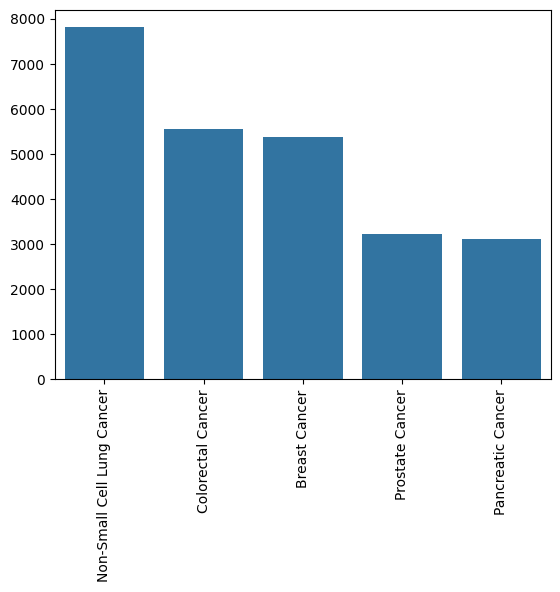

In [35]:
sns.barplot(x = sample.CANCER_TYPE.value_counts().index, y = sample.CANCER_TYPE.value_counts().values)
plt.xticks(rotation=90)
plt.xlabel('')
plt.show()

In [5]:
treatment = pd.read_csv('msk_chord_2024/data_timeline_treatment.txt', sep='\t', comment='#')
treatment.head(1)

,PATIENT_ID,START_DATE,STOP_DATE,EVENT_TYPE,SUBTYPE,AGENT,RX_INVESTIGATIVE,FLAG_OROTOPICAL
0,P-0000012,-5437,-5369,Treatment,Chemo,CYCLOPHOSPHAMIDE,N,0


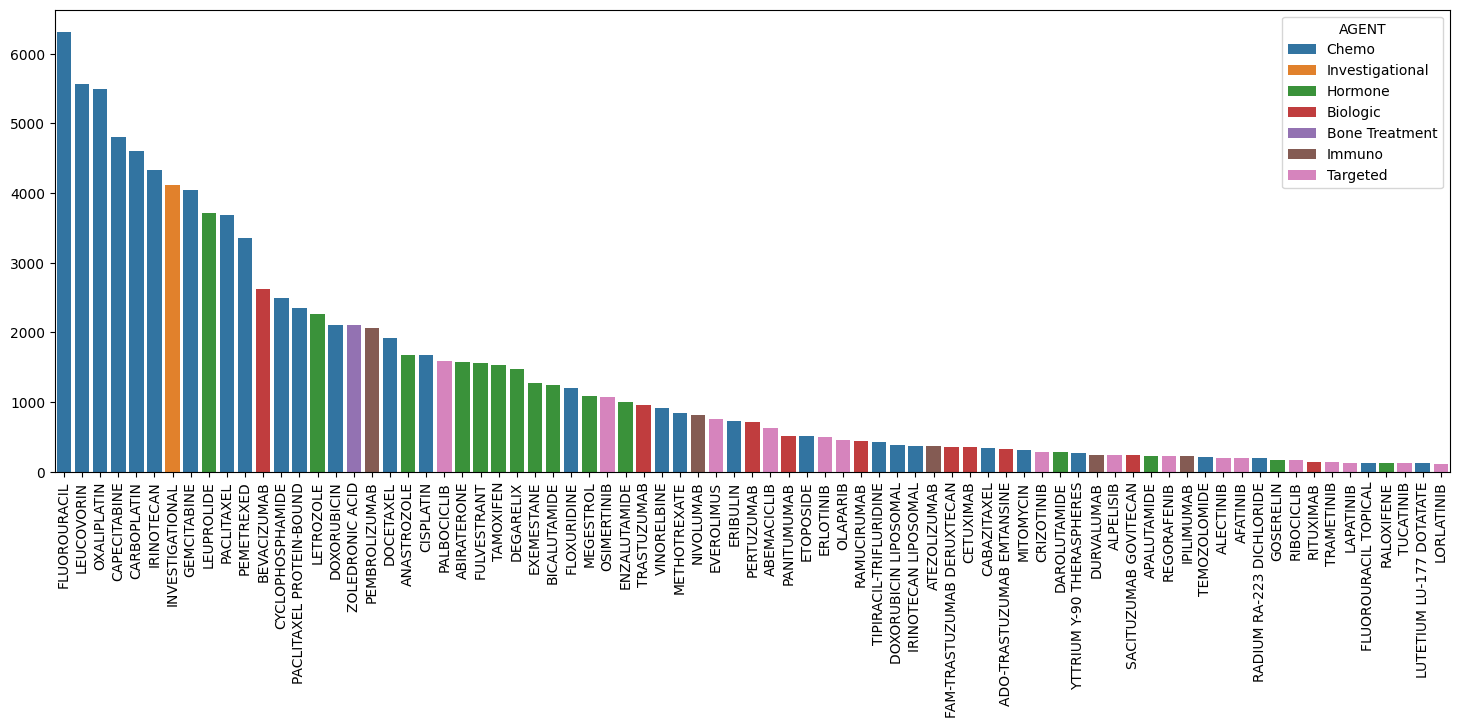

In [32]:
df = treatment[['PATIENT_ID', 'AGENT']].drop_duplicates().AGENT.value_counts()
treatment_type = treatment[['AGENT', 'SUBTYPE']].drop_duplicates().set_index('AGENT').to_dict()['SUBTYPE']
df = df[df > 100]
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
sns.barplot(x = df.index, y = df.values, hue = df.index.map(treatment_type))
plt.xticks(rotation=90, fontsize=10)
plt.xlabel('', fontsize=12)
plt.show()

### filter for targeted therapeutics

In [5]:
treatment[(treatment.SUBTYPE == 'Targeted')&(treatment['PATIENT_ID'].isin(sample['PATIENT_ID'].value_counts()[sample['PATIENT_ID'].value_counts() == 1].index))]

,PATIENT_ID,START_DATE,STOP_DATE,EVENT_TYPE,SUBTYPE,AGENT,RX_INVESTIGATIVE,FLAG_OROTOPICAL
30,P-0000036,22,931,Treatment,Targeted,CRIZOTINIB,N,1
31,P-0000036,931,3512,Treatment,Targeted,CRIZOTINIB,N,1
55,P-0000058,1289,1629,Treatment,Targeted,LAPATINIB,N,1
61,P-0000058,1540,1733,Treatment,Targeted,ABEMACICLIB,N,1
70,P-0000066,629,1589,Treatment,Targeted,ABEMACICLIB,N,1
...,...,...,...,...,...,...,...,...
134876,P-0089403,147,177,Treatment,Targeted,OLAPARIB,N,1
134882,P-0089413,-400,225,Treatment,Targeted,ABEMACICLIB,N,1
134888,P-0089445,-212,80,Treatment,Targeted,PALBOCICLIB,N,1
134906,P-0089490,22,181,Treatment,Targeted,OSIMERTINIB,N,1


In [6]:
treatment[(treatment.SUBTYPE == 'Targeted')&(treatment.START_DATE > 0)].PATIENT_ID.nunique()

4221

There's a potential cohort of 4.2k patients that have received targeted therapeutics after the MSK-IMPACT was administered.

In [7]:
sample[sample['PATIENT_ID'].isin(treatment[(treatment.SUBTYPE == 'Targeted')&
                                           (treatment.START_DATE > 0)].PATIENT_ID.unique())].CANCER_TYPE.value_counts()

CANCER_TYPE
Breast Cancer                 1716
Non-Small Cell Lung Cancer    1703
Colorectal Cancer              363
Prostate Cancer                263
Pancreatic Cancer              195
Name: count, dtype: int64

In [8]:
sample[sample['PATIENT_ID'].isin(treatment[(treatment.SUBTYPE == 'Targeted')&
                                           (treatment.START_DATE > 0)].PATIENT_ID.unique())].CANCER_TYPE.value_counts(normalize = True)

CANCER_TYPE
Breast Cancer                 0.404717
Non-Small Cell Lung Cancer    0.401651
Colorectal Cancer             0.085613
Prostate Cancer               0.062028
Pancreatic Cancer             0.045991
Name: proportion, dtype: float64

The key limitation I see is the lack of variety of cancer types, but these are also the cancer types with the most targeted therapy approvals? And the whole study was only done on these cancer types too. 

In [9]:
sample.CANCER_TYPE.value_counts()

CANCER_TYPE
Non-Small Cell Lung Cancer    7809
Colorectal Cancer             5543
Breast Cancer                 5368
Prostate Cancer               3211
Pancreatic Cancer             3109
Name: count, dtype: int64

In [10]:
sample.CANCER_TYPE.value_counts(normalize = True)

CANCER_TYPE
Non-Small Cell Lung Cancer    0.311861
Colorectal Cancer             0.221366
Breast Cancer                 0.214377
Prostate Cancer               0.128235
Pancreatic Cancer             0.124161
Name: proportion, dtype: float64

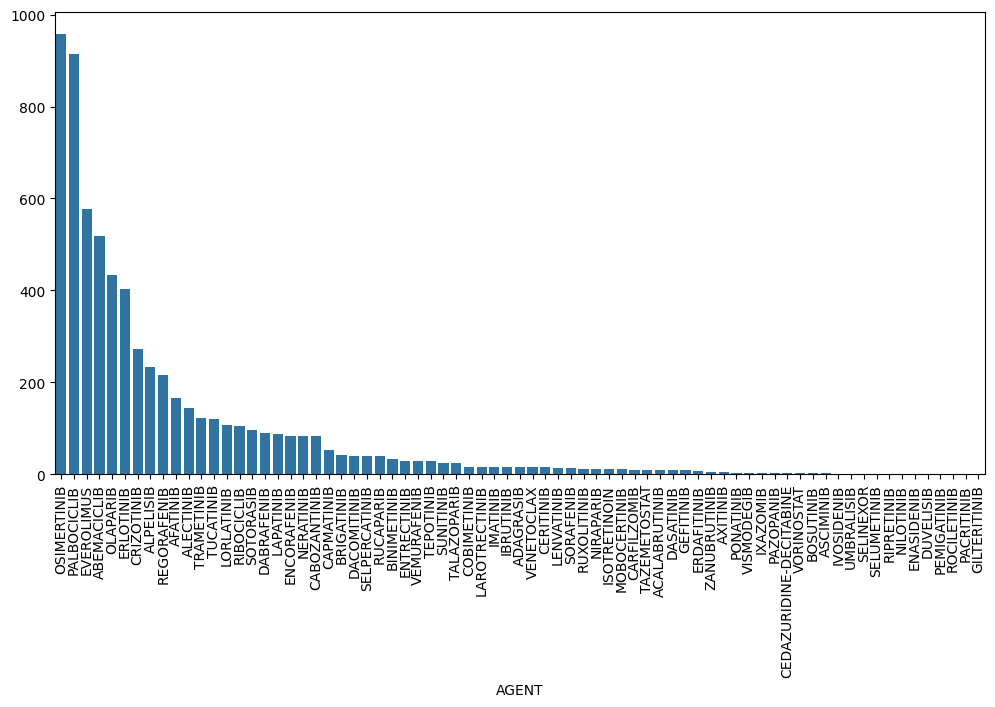

In [16]:
df = treatment[(treatment.SUBTYPE == 'Targeted')&(treatment.START_DATE > 0)].AGENT.value_counts()
import seaborn as sns, matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.barplot(x = df.index, y = df.values)
plt.xticks(rotation=90)
plt.show()

There's a decent number of variety in terms of targeted therapeutics.